<a href="https://colab.research.google.com/github/lmbernardo7520112/desafio_bairesdev_embedded_vision_project_LMB/blob/main/C%C3%B3pia_de_Etapa_Consolidar_Vis%C3%A3o_Computacional_aplicada_ao_reconhecimento_de_emo%C3%A7%C3%B5es.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

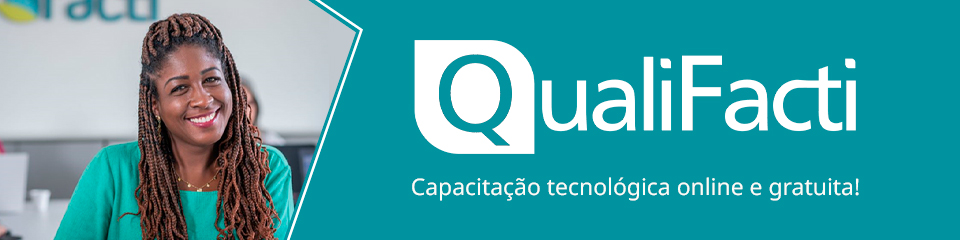

# **Inteligência Artificial aplicada à Visão Computacional**

**Capítulo 6: Visão Computacional aplicada ao reconhecimento de emoções**



<p align="justify">

Todos os direitos reservados à Facti, 2024
<p>

[www.qualifacti.com.br](https://)

---

<p align="justify">
É importante esclarecer que estas atividades não compõem a avaliação e não haverá correção formal por parte dos instrutores; o objetivo é a autoaprendizagem e prática.
<p>

---

# **ETAPA CONSOLIDAR**

---

# **Recado importante**


Olá,
<p align="justify">
Como parte do capítulo de <b>reconhecimento de emoções</b>, gostaríamos de ressaltar a importância de realizar as atividades de implementação fornecidas. Estas atividades são cuidadosamente desenhadas para reforçar o conteúdo apresentado.
Lembre-se, a implementação é uma habilidade que se aprimora com a prática. Ao aplicar os conceitos aprendidos, especialmente por meio da escrita e execução de códigos, você ganhará uma compreensão mais profunda e prática dos modelos.
Encorajamos todos a dedicar tempo a essas atividades. Ao fazer isso, você não apenas reforçará o que foi ensinado, mas também desenvolverá as habilidades essenciais de resolução de problemas e depuração de código.

Lembrem-se: não basta apenas aprender, é preciso codificar! O caminho para dominar os modelos começa com a experiência prática.

Atenciosamente,

Júlio e Marcelo
<p>

---

# **Estudo de caso**

## Importando as bibliotecas

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow
import zipfile

cv2.__version__

'4.12.0'

In [ ]:
# Instalação da versão 2.19.0 do tensorflow
!pip install tensorflow==2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 52.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 17.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-decision-forests 1.11.0 requires tensorflow==2.18.0, but you have tens

In [ ]:
import tensorflow
tensorflow.__version__

'2.19.0'

## Conectando com o Drive e acessando os arquivos

In [ ]:
# Conectando o Colab ao Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Realize o dowload da pasta Material_complementar_reconhecimento_emocoes.zip do Google Sala de Aula e transfira-a para o seu Google Drive
# Localize o caminho da pasta no menu Arquivos, no menu lateral esquerdo
path = "/content/gdrive/MyDrive/Material_complementar_reconhecimento_emocoes.zip"
zip_object = zipfile.ZipFile(file=path, mode="r")
zip_object.extractall("./")

In [ ]:
# Indique o caminho da pasta "fer2013.zip" para descompactá-la. São arquivos organizados conforme cada uma das classes de emoções.
base_imgs = '/content/fer2013.zip'
zip_object = zipfile.ZipFile(file = base_imgs, mode = 'r')
zip_object.extractall('./')
zip_object.close

<bound method ZipFile.close of <zipfile.ZipFile filename='/content/fer2013.zip' mode='r'>>

## Acessando a base com fotos de expressões faciais



In [ ]:
# Arquivo que contem as informações do banco de imagens das fotos de cada classe de emoção.
data = pd.read_csv('fer2013/fer2013.csv')
data.tail()

,emotion,pixels,Usage
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest
35886,2,19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...,PrivateTest


Text(0.5, 1.0, 'Imagens x emoções')

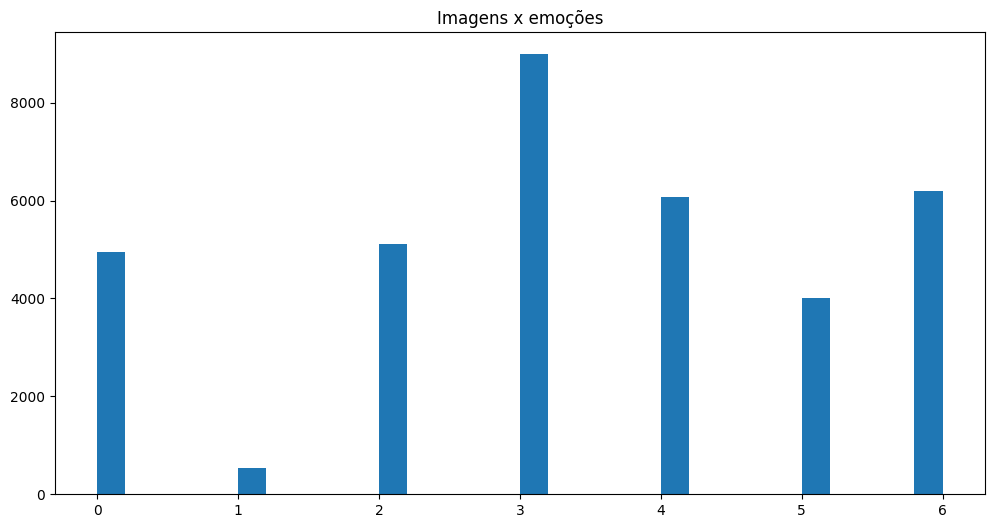

In [ ]:
# Visualizando a quantidade de fotos existente em cada uma das classes de emoções.
plt.figure(figsize=(12,6))
plt.hist(data['emotion'], bins = 30)
plt.title('Imagens x emoções')

# Classes: ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']

## Pré-processamento

In [ ]:
# Listando os valores de pixels das imagens
pixels = data['pixels'].tolist()

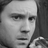

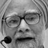

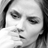

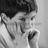

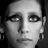

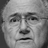

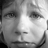

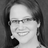

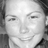

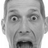

In [ ]:
# Redimensionando as imagens encontradas
largura, altura = 48, 48
faces = []
amostras = 0
for pixel_sequence in pixels:
  face = [int(pixel) for pixel in pixel_sequence.split(' ')]
  face = np.asarray(face).reshape(largura, altura)
  faces.append(face)

  if (amostras < 10): # demonstrando um conjunto de 10 amostras
    cv2_imshow(face)
  amostras += 1

In [ ]:
# Demonstrando a quantidade total de imagens em que foram encontradas faces.
print('Número total de imagens no dataset: ', str(len(faces)))

Número total de imagens no dataset:  35887


In [ ]:
# Convertendo as faces das imagens em arrays
faces = np.asarray(faces)

In [ ]:
# Demonstrando as formas das faces das imagens (quantidade, pixels x, pixels y)
faces.shape

(35887, 48, 48)

In [ ]:
# Expandindo as dimensões das faces das imagens (quantidade, pixels x, pixels y, quantidade de canais)
faces = np.expand_dims(faces, -1)
faces.shape

(35887, 48, 48, 1)

In [ ]:
# Definindo a função para normalizar as imagens
def normalizar(x):
  x = x.astype('float32')
  x = x / 255.0
  return x

In [ ]:
# Normalizando as imagens das faces
faces = normalizar(faces)

In [ ]:
# Atribuindo valores a cada uma das classes de emoções
emocoes = pd.get_dummies(data['emotion']).values

## Imports do Tensorflow/Keras

In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model
from tensorflow.keras.models import model_from_json

## Dividir em conjuntos para treinamento e validação

In [ ]:
# Criando os conjuntos de treinamento e validação
X_train, X_test, y_train, y_test = train_test_split(faces, emocoes, test_size = 0.1, random_state = 42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state = 41)

In [ ]:
# Quantidade das imagens dos conjuntos
print('Número de imagens no conjunto de treinamento:', len(X_train))
print('Número de imagens no conjunto de teste:', len(X_test))
print('Número de imagens no conjunto de validação:', len(X_val))

Número de imagens no conjunto de treinamento: 29068
Número de imagens no conjunto de teste: 3589
Número de imagens no conjunto de validação: 3230


In [ ]:
# Base de dados para a matriz de confusão
np.save('mod_xtest', X_test)
np.save('mod_ytest', y_test)

modelo versão "magra".

In [ ]:
# --- ARQUITETURA REDUZIDA PARA MICROCONTROLADORES ---

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization

num_features = 16  # REDUZIDO de 64 para 16
num_labels = 7
batch_size = 64
width, height = 48, 48

model = Sequential(name="CNN_Embarcado")

# Bloco 1
model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu', input_shape=(width, height, 1)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Bloco 2
model.add(Conv2D(num_features * 2, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Bloco 3
model.add(Conv2D(num_features * 4, kernel_size=(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Camadas de Classificação
model.add(Flatten())
model.add(Dense(num_features * 4, activation='relu')) # REDUZIDO
model.add(Dropout(0.4))
model.add(Dense(num_labels, activation='softmax'))

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "CNN_Embarcado"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 46, 46, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 46, 46, 16)     │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 23, 23, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 21, 21, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 21, 21, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 8, 8, 64)       │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 4, 4, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 7)              │           455 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 89,799 (350.78 KB)

 Trainable params: 89,575 (349.90 KB)

 Non-trainable params: 224 (896.00 B)

Compilando o modelo versao magra

In [ ]:
model.compile(loss='categorical_crossentropy',  # Classificação - cálculo dos erros
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),  # Atualização dos pesos / taxa decaimento e taxa aprendizagem
              metrics=['accuracy'])

arquivo_modelo = 'modelo_01_expressoes.h5'  # Traz os modelos salvos - com o conjunto dos pesos de aprendizado da rede neural
arquivo_modelo_json = 'modelo_01_expressoes.json'  # Traz a estrutura da rede neural

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
# Converte o modelo treinado para o formato JSON.
model_json = model.to_json()
# Abre um arquivo em modo de escrita para salvar a estrutura do modelo em formato JSON.
# O caminho e o nome do arquivo são definidos pela variável 'arquivo_modelo_json'.
with open(arquivo_modelo_json, 'w') as json_file:
  json_file.write(model_json)

In [ ]:
# Define o número de épocas (iterações) para o treinamento do modelo
epochs = 50 # O modelo será treinado por apenas 1 época, aumente para melhorar a análise

# Inicia o treinamento do modelo usando os dados de treinamento e validação
history = model.fit(np.array(X_train), np.array(y_train),
                    batch_size = batch_size, #64
                    epochs = epochs, #1
                    verbose = 1,
                    validation_data = (np.array(X_val), np.array(y_val)),
                    shuffle=True,
                    callbacks=[lr_reducer, early_stopper, checkpointer])

Epoch 1/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2431 - loss: 2.0108
Epoch 1: val_loss improved from inf to 2.13993, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 19s 25ms/step - accuracy: 0.2432 - loss: 2.0103 - val_accuracy: 0.2628 - val_loss: 2.1399 - learning_rate: 0.0010
Epoch 2/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3457 - loss: 1.6445
Epoch 2: val_loss improved from 2.13993 to 1.46773, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.3458 - loss: 1.6444 - val_accuracy: 0.4294 - val_loss: 1.4677 - learning_rate: 0.0010
Epoch 3/50
448/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3816 - loss: 1.5692
Epoch 3: val_loss improved from 1.46773 to 1.41820, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.3817 - loss: 1.5690 - val_accuracy: 0.4387 - val_loss: 1.4182 - learning_rate: 0.0010
Epoch 4/50
449/455 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4075 - loss: 1.5295
Epoch 4: val_loss improved from 1.41820 to 1.38489, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4075 - loss: 1.5293 - val_accuracy: 0.4579 - val_loss: 1.3849 - learning_rate: 0.0010
Epoch 5/50
447/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4168 - loss: 1.4935
Epoch 5: val_loss did not improve from 1.38489
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.4168 - loss: 1.4933 - val_accuracy: 0.4341 - val_loss: 1.4141 - learning_rate: 0.0010
Epoch 6/50
452/455 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4269 - loss: 1.4667
Epoch 6: val_loss improved from 1.38489 to 1.34524, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4270 - loss: 1.4666 - val_accuracy: 0.4833 - val_loss: 1.3452 - learning_rate: 0.0010
Epoch 7/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4489 - loss: 1.4223
Epoch 7: val_loss improved from 1.34524 to 1.31394, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4489 - loss: 1.4223 - val_accuracy: 0.4957 - val_loss: 1.3139 - learning_rate: 0.0010
Epoch 8/50
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4676 - loss: 1.3949
Epoch 8: val_loss improved from 1.31394 to 1.26711, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4676 - loss: 1.3949 - val_accuracy: 0.5164 - val_loss: 1.2671 - learning_rate: 0.0010
Epoch 9/50
446/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4764 - loss: 1.3637
Epoch 9: val_loss improved from 1.26711 to 1.23095, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4763 - loss: 1.3639 - val_accuracy: 0.5238 - val_loss: 1.2309 - learning_rate: 0.0010
Epoch 10/50
448/455 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4766 - loss: 1.3576
Epoch 10: val_loss did not improve from 1.23095
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4766 - loss: 1.3577 - val_accuracy: 0.5099 - val_loss: 1.2749 - learning_rate: 0.0010
Epoch 11/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4902 - loss: 1.3349
Epoch 11: val_loss did not improve from 1.23095
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.4902 - loss: 1.3349 - val_accuracy: 0.5087 - val_loss: 1.3109 - learning_rate: 0.0010
Epoch 12/50
451/455 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4992 - loss: 1.3156
Epoch 12: val_loss improved from 1.23095 to 1.18625, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.4991 - loss: 1.3156 - val_accuracy: 0.5378 - val_loss: 1.1862 - learning_rate: 0.0010
Epoch 13/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5021 - loss: 1.2968
Epoch 13: val_loss improved from 1.18625 to 1.18308, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5021 - loss: 1.2969 - val_accuracy: 0.5505 - val_loss: 1.1831 - learning_rate: 0.0010
Epoch 14/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5011 - loss: 1.2969
Epoch 14: val_loss improved from 1.18308 to 1.17884, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5011 - loss: 1.2969 - val_accuracy: 0.5508 - val_loss: 1.1788 - learning_rate: 0.0010
Epoch 15/50
451/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5085 - loss: 1.2797
Epoch 15: val_loss improved from 1.17884 to 1.16599, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5085 - loss: 1.2798 - val_accuracy: 0.5467 - val_loss: 1.1660 - learning_rate: 0.0010
Epoch 16/50
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5172 - loss: 1.2659
Epoch 16: val_loss did not improve from 1.16599
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5172 - loss: 1.2660 - val_accuracy: 0.5464 - val_loss: 1.1828 - learning_rate: 0.0010
Epoch 17/50
444/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5172 - loss: 1.2641
Epoch 17: val_loss improved from 1.16599 to 1.16433, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5172 - loss: 1.2640 - val_accuracy: 0.5502 - val_loss: 1.1643 - learning_rate: 0.0010
Epoch 18/50
447/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5197 - loss: 1.2489
Epoch 18: val_loss did not improve from 1.16433
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5198 - loss: 1.2488 - val_accuracy: 0.4985 - val_loss: 1.2898 - learning_rate: 0.0010
Epoch 19/50
452/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5255 - loss: 1.2445
Epoch 19: val_loss did not improve from 1.16433
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5255 - loss: 1.2444 - val_accuracy: 0.5548 - val_loss: 1.1668 - learning_rate: 0.0010
Epoch 20/50
449/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5272 - loss: 1.2284
Epoch 20: ReduceLROnPlateau reducing learning rate to 0.0009000000427477062.

Epoch 20: val_loss did not improve from 1.16433
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5273 - loss: 1.2285 - val_accuracy: 0.5

455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5438 - loss: 1.1953 - val_accuracy: 0.5650 - val_loss: 1.1422 - learning_rate: 9.0000e-04
Epoch 23/50
449/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5459 - loss: 1.1967
Epoch 23: val_loss did not improve from 1.14220
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5458 - loss: 1.1968 - val_accuracy: 0.5613 - val_loss: 1.1530 - learning_rate: 9.0000e-04
Epoch 24/50
447/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5444 - loss: 1.1919
Epoch 24: val_loss improved from 1.14220 to 1.14200, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5444 - loss: 1.1921 - val_accuracy: 0.5588 - val_loss: 1.1420 - learning_rate: 9.0000e-04
Epoch 25/50
448/455 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5393 - loss: 1.2084
Epoch 25: val_loss did not improve from 1.14200
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5394 - loss: 1.2083 - val_accuracy: 0.5006 - val_loss: 1.2944 - learning_rate: 9.0000e-04
Epoch 26/50
449/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5453 - loss: 1.1988
Epoch 26: val_loss did not improve from 1.14200
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5453 - loss: 1.1987 - val_accuracy: 0.5514 - val_loss: 1.1816 - learning_rate: 9.0000e-04
Epoch 27/50
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5485 - loss: 1.1831
Epoch 27: ReduceLROnPlateau reducing learning rate to 0.0008100000384729356.

Epoch 27: val_loss did not improve from 1.14200
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5486 - loss: 1.1831 - val_a

455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5603 - loss: 1.1622 - val_accuracy: 0.5697 - val_loss: 1.1275 - learning_rate: 8.1000e-04
Epoch 29/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5561 - loss: 1.1587
Epoch 29: val_loss improved from 1.12749 to 1.10599, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5561 - loss: 1.1588 - val_accuracy: 0.5789 - val_loss: 1.1060 - learning_rate: 8.1000e-04
Epoch 30/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5572 - loss: 1.1615
Epoch 30: val_loss did not improve from 1.10599
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5572 - loss: 1.1615 - val_accuracy: 0.5783 - val_loss: 1.1124 - learning_rate: 8.1000e-04
Epoch 31/50
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5683 - loss: 1.1382
Epoch 31: val_loss improved from 1.10599 to 1.09792, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5683 - loss: 1.1382 - val_accuracy: 0.5817 - val_loss: 1.0979 - learning_rate: 8.1000e-04
Epoch 32/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5664 - loss: 1.1416
Epoch 32: val_loss did not improve from 1.09792
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5664 - loss: 1.1417 - val_accuracy: 0.5598 - val_loss: 1.1531 - learning_rate: 8.1000e-04
Epoch 33/50
450/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5640 - loss: 1.1442
Epoch 33: val_loss did not improve from 1.09792
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5640 - loss: 1.1443 - val_accuracy: 0.5765 - val_loss: 1.1120 - learning_rate: 8.1000e-04
Epoch 34/50
449/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5665 - loss: 1.1470
Epoch 34: ReduceLROnPlateau reducing learning rate to 0.0007290000503417104.

Epoch 34: val_loss did not improve from 1.09792
455/455 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5665 - loss: 1.1470 - val_a

455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5677 - loss: 1.1356 - val_accuracy: 0.5870 - val_loss: 1.0914 - learning_rate: 7.2900e-04
Epoch 36/50
446/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5746 - loss: 1.1115
Epoch 36: val_loss did not improve from 1.09136
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5745 - loss: 1.1117 - val_accuracy: 0.5879 - val_loss: 1.0936 - learning_rate: 7.2900e-04
Epoch 37/50
452/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5750 - loss: 1.1195
Epoch 37: val_loss did not improve from 1.09136
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5749 - loss: 1.1196 - val_accuracy: 0.5505 - val_loss: 1.1919 - learning_rate: 7.2900e-04
Epoch 38/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5772 - loss: 1.1211
Epoch 38: val_loss improved from 1.09136 to 1.08102, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5771 - loss: 1.1212 - val_accuracy: 0.5950 - val_loss: 1.0810 - learning_rate: 7.2900e-04
Epoch 39/50
447/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5833 - loss: 1.1045
Epoch 39: val_loss did not improve from 1.08102
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5831 - loss: 1.1047 - val_accuracy: 0.5737 - val_loss: 1.1142 - learning_rate: 7.2900e-04
Epoch 40/50
453/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5800 - loss: 1.1010
Epoch 40: val_loss did not improve from 1.08102
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5800 - loss: 1.1011 - val_accuracy: 0.5641 - val_loss: 1.1617 - learning_rate: 7.2900e-04
Epoch 41/50
447/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5782 - loss: 1.1142
Epoch 41: ReduceLROnPlateau reducing learning rate to 0.0006561000715009868.

Epoch 41: val_loss did not improve from 1.08102
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5782 - loss: 1.1141 - val_a

455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.5817 - loss: 1.1059 - val_accuracy: 0.5929 - val_loss: 1.0803 - learning_rate: 6.5610e-04
Epoch 44/50
450/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5819 - loss: 1.0983
Epoch 44: val_loss improved from 1.08027 to 1.07644, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5819 - loss: 1.0984 - val_accuracy: 0.5929 - val_loss: 1.0764 - learning_rate: 6.5610e-04
Epoch 45/50
446/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5855 - loss: 1.0895
Epoch 45: val_loss did not improve from 1.07644
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5855 - loss: 1.0897 - val_accuracy: 0.5885 - val_loss: 1.1061 - learning_rate: 6.5610e-04
Epoch 46/50
455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5894 - loss: 1.0738
Epoch 46: val_loss did not improve from 1.07644
455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5894 - loss: 1.0739 - val_accuracy: 0.5765 - val_loss: 1.1170 - learning_rate: 6.5610e-04
Epoch 47/50
447/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5874 - loss: 1.0864
Epoch 47: ReduceLROnPlateau reducing learning rate to 0.0005904900433961303.

Epoch 47: val_loss did not improve from 1.07644
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5874 - loss: 1.0865 - val_a

455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.5908 - loss: 1.0787 - val_accuracy: 0.5966 - val_loss: 1.0730 - learning_rate: 5.9049e-04
Epoch 49/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5869 - loss: 1.0788
Epoch 49: val_loss improved from 1.07302 to 1.06387, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5869 - loss: 1.0788 - val_accuracy: 0.5978 - val_loss: 1.0639 - learning_rate: 5.9049e-04
Epoch 50/50
454/455 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5841 - loss: 1.0871
Epoch 50: val_loss did not improve from 1.06387
455/455 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5841 - loss: 1.0871 - val_accuracy: 0.5811 - val_loss: 1.1197 - learning_rate: 5.9049e-04


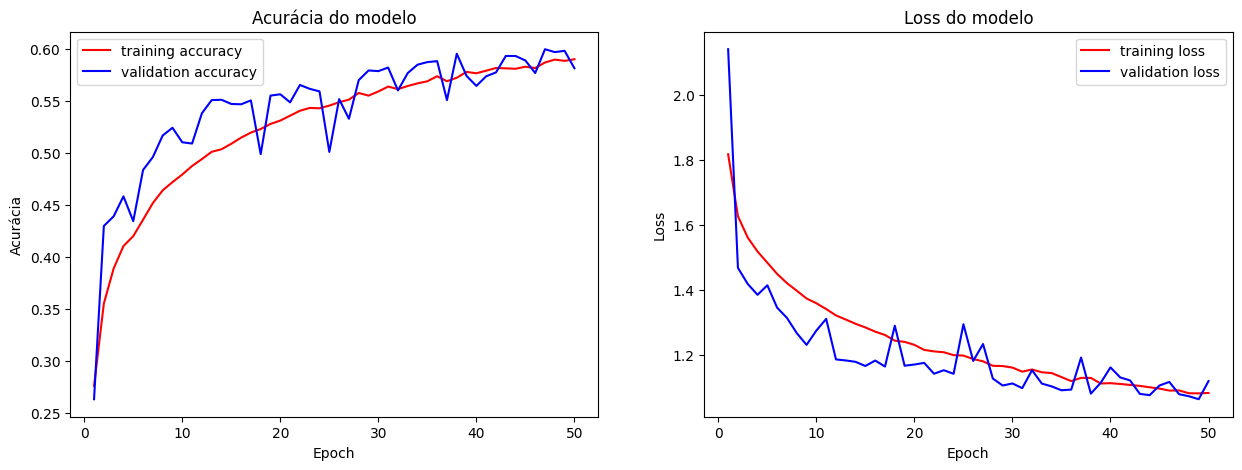

In [ ]:
def plota_historico_modelo(historico_modelo):
  fig, axs = plt.subplots(1, 2, figsize=(15,5))     # Cria uma figura com dois gráficos lado a lado (1 linha, 2 colunas), com um tamanho de 15x5 polegadas

  # Primeiro gráfico: Acurácia do modelo durante o treinamento e validação
  axs[0].plot(range(1, len(historico_modelo.history['accuracy']) + 1), historico_modelo.history['accuracy'], 'r')
  axs[0].plot(range(1, len(historico_modelo.history['val_accuracy']) + 1), historico_modelo.history['val_accuracy'], 'b')
  axs[0].set_title('Acurácia do modelo')
  axs[0].set_ylabel('Acurácia')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['training accuracy', 'validation accuracy'], loc = 'best')

  # Segundo gráfico: Perda (Loss) do modelo durante o treinamento e validação
  axs[1].plot(range(1, len(historico_modelo.history['loss']) + 1), historico_modelo.history['loss'], 'r')
  axs[1].plot(range(1, len(historico_modelo.history['val_loss']) + 1), historico_modelo.history['val_loss'], 'b')
  axs[1].set_title('Loss do modelo')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['training loss', 'validation loss'], loc = 'best')
  fig.savefig('historico_modelo_mod01.png') # Salva a figura como um arquivo de imagem 'historico_modelo_mod01.png'

# Chama a função para plotar o histórico de treinamento armazenado na variável 'history'
plota_historico_modelo(history)

In [ ]:
# Relação do erro x acurárcia
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size = batch_size) #
scores

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.5801 - loss: 1.1425


[1.1552156209945679, 0.5739760398864746]

In [ ]:
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

Acurácia: 0.5739760398864746
Erro: 1.1552156209945679


In [ ]:
# Valores reais e das predições
true_y = []
pred_y = []
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')

In [ ]:
# Carregar o modelo salvo com a estrutura da rede neural
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()

In [ ]:
# Transformar o modelo h5
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)

In [ ]:
# Predição dos pixels de cada uma das imagens para cada uma das emoções
y_pred = loaded_model.predict(x)

113/113 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [ ]:
# Transformar as predições em uma lista
yp = y_pred.tolist()
yt = y.tolist() # com as respostas reais
count = 0

In [ ]:
# Quantidade de registros na base de dados de teste
len(y)

3589

In [ ]:
# Obtendo o maior valor da probabilidade
for i in range(len(y)):
  yy = max(yp[i])
  yyt = max(yt[i])
  pred_y.append(yp[i].index(yy))
  true_y.append(yt[i].index(yyt))
  if (yp[i].index(yy) == yt[i].index(yyt)):
    count += 1

acc = (count / len(y)) * 100

In [ ]:
# Demonstrar o valor da acurácia
print('Acurácia no conjunto de teste: ' + str(acc))

Acurácia no conjunto de teste: 59.543048202842016


In [ ]:
# Salvar os valores das emoções e predições
np.save('truey_mod01', true_y)
np.save('predy_mod01', pred_y)

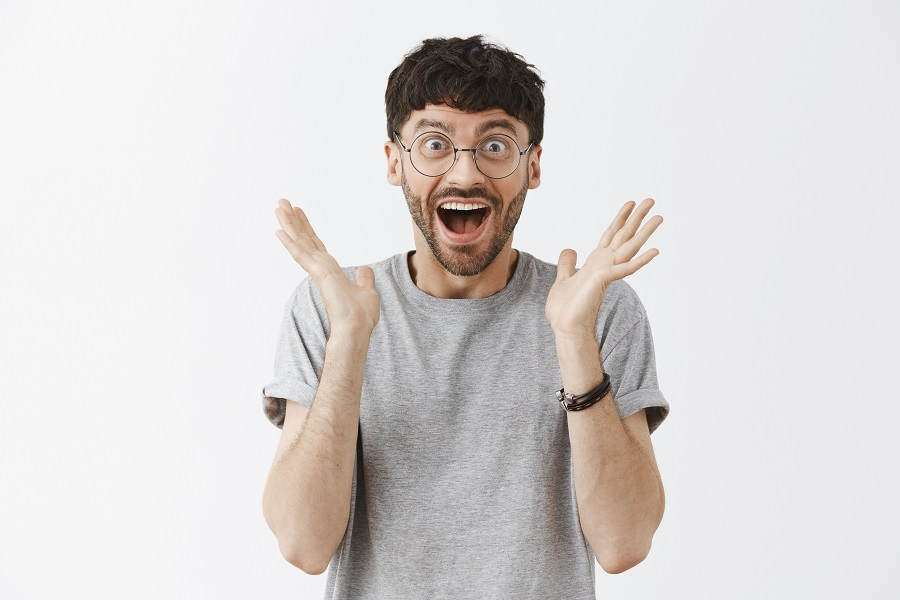

In [ ]:
# Localize o arquivo "salagooglemeet.jpg" para realizar o reconhecimento das emoções
imagem = cv2.imread('/content/testes/homem_surpreso.jpg')
cv2_imshow(imagem)

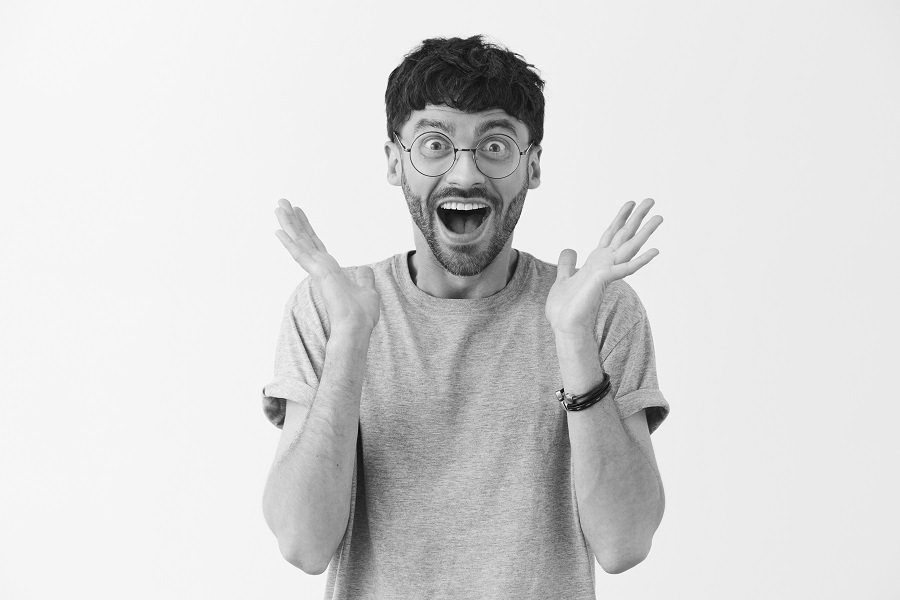

In [ ]:
# Transformando a imagem original em escala de cinza
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
# Utilize o arquivo haarcascade de reconhecimento facial para detectar as faces na imagem
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 581ms/step


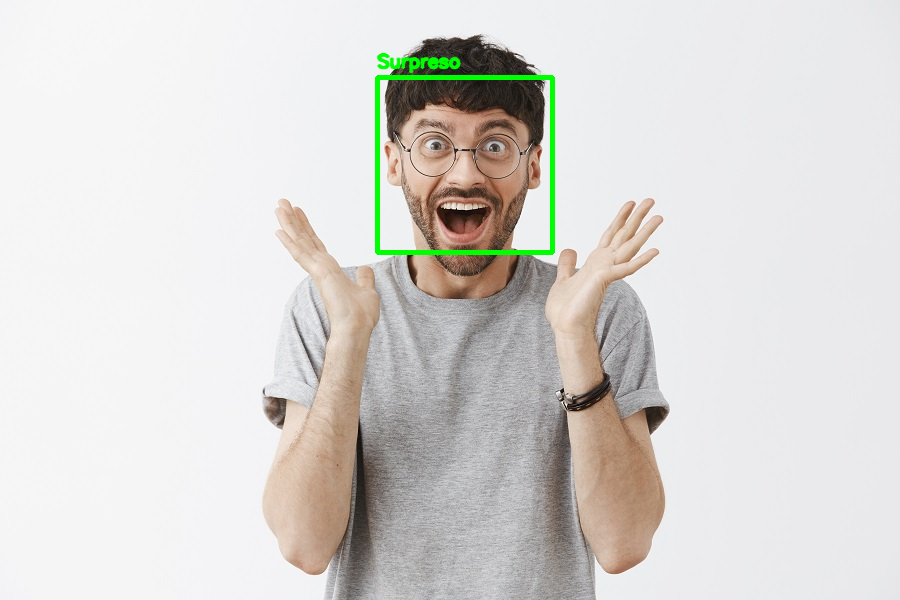

In [ ]:
# Reconhecendo as emoções nas faces detectadas, criando um retângulo e indicação textual na imagem original.
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 4)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

cv2_imshow(original)

In [ ]:
import tensorflow as tf
import numpy as np

# 1. Salve o modelo Keras treinado
keras_model_filename = 'emotion_model_fp32.h5'
model.save(keras_model_filename)
print(f"Modelo Keras salvo em: {keras_model_filename}")

# 2. Crie o Conversor TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# 3. Habilite a Quantização de Inteiros de 8 bits
converter.optimizations = [tf.lite.Optimize.DEFAULT]

# 4. Forneça um conjunto de dados representativo para calibração
# Usaremos um subconjunto dos dados de treinamento (X_train)
def representative_dataset_gen():
  for i in range(100): # Use 100 amostras para calibrar
    yield [X_train[i:i+1]]

converter.representative_dataset = representative_dataset_gen
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]
converter.inference_input_type = tf.int8  # ou tf.uint8
converter.inference_output_type = tf.int8 # ou tf.uint8

# 5. Converta o modelo
tflite_model_quant = converter.convert()

# 6. Salve o modelo TFLite quantizado em um arquivo
tflite_model_filename = 'modelo_expressoes_quant.tflite'
with open(tflite_model_filename, 'wb') as f:
  f.write(tflite_model_quant)

print(f"Modelo TFLite quantizado e otimizado salvo em: {tflite_model_filename}")


Modelo Keras salvo em: emotion_model_fp32.h5
Saved artifact at '/tmp/tmptf3jkpix'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 48, 48, 1), dtype=tf.float32, name='keras_tensor_993')
Output Type:
  TensorSpec(shape=(None, 7), dtype=tf.float32, name=None)
Captures:
  135359988854864: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988857360: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988854096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988858320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988855824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988856592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988857936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988858128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988858704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  135359988858512: TensorSpec(shape=(),

/usr/local/lib/python3.11/dist-packages/tensorflow/lite/python/convert.py:854: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn(


Modelo TFLite quantizado e otimizado salvo em: modelo_expressoes_quant.tflite


In [ ]:
# Nome do arquivo TFLite de entrada (o que você acabou de criar)
TFLITE_MODEL_FILENAME = 'modelo_expressoes_quant.tflite'

# Nome do arquivo C de saída
C_MODEL_FILENAME = 'model_data.cc'

# Abre o arquivo TFLite em modo de leitura binária
with open(TFLITE_MODEL_FILENAME, 'rb') as f:
    tflite_model_data = f.read()

# Prepara o conteúdo do arquivo C
c_array_content = f"// Modelo: {TFLITE_MODEL_FILENAME}\n"
c_array_content += f"// Tamanho: {len(tflite_model_data)} bytes\n\n"

# Define o nome do array C (baseado no nome do arquivo, para compatibilidade)
# Substitui caracteres inválidos como '.' por '_'
array_name = TFLITE_MODEL_FILENAME.replace('.', '_')

# Escreve a definição do array
c_array_content += f"const unsigned char {array_name}[] = {{\n  "

# Itera sobre cada byte do modelo e o formata como um valor hexadecimal
hex_values = []
for byte in tflite_model_data:
    hex_values.append(f"0x{byte:02x}")

# Adiciona os valores hexadecimais ao conteúdo, com quebras de linha a cada 12 valores
for i, hex_val in enumerate(hex_values):
    c_array_content += hex_val + ", "
    if (i + 1) % 12 == 0:
        c_array_content += "\n  "

c_array_content += "\n};\n\n"

# Adiciona a variável de tamanho
c_array_content += f"const unsigned int {array_name}_len = {len(tflite_model_data)};\n"

# Salva o conteúdo no arquivo .cc
with open(C_MODEL_FILENAME, 'w') as f:
    f.write(c_array_content)

print(f"Arquivo C '{C_MODEL_FILENAME}' gerado com sucesso!")
print("Ele está pronto para ser baixado e usado no seu projeto do Pico.")


Arquivo C 'model_data.cc' gerado com sucesso!
Ele está pronto para ser baixado e usado no seu projeto do Pico.


Atenção!!!: A partir daqui o modelo é muito grande para usar no microcontrolador - desconsiderar para criação de um modelo que caiba no raspberry pi pico w

## Arquitetura do modelo da rede neural convolucional (CNN)

**Arquitetura do modelo**

In [ ]:
# Criando o modelo sequencial da rede neural, trazendo cada uma das camadas.
num_features = 64
num_labels = 7
batch_size = 64
width, height = 48, 48

model = Sequential()

model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu',
                 input_shape=(width, height, 1), data_format = 'channels_last',
                 kernel_regularizer = l2(0.01)))
model.add(Conv2D(num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(2*2*2*num_features, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(2*2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*2*num_features, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(2*num_features, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels, activation = 'softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 46, 46, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 46, 46, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 23, 23, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 23, 23, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 23, 23, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 11, 11, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 11, 11, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 5, 5, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 5, 5, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 5, 5, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 5, 5, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 5, 5, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 5,905,863 (22.53 MB)

 Trainable params: 5,902,151 (22.51 MB)

 Non-trainable params: 3,712 (14.50 KB)

## Compilando o modelo

In [ ]:
model.compile(loss='categorical_crossentropy',  # Classificação - cálculo dos erros
              optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),  # Atualização dos pesos / taxa decaimento e taxa aprendizagem
              metrics=['accuracy'])

arquivo_modelo = 'modelo_01_expressoes.h5'  # Traz os modelos salvos - com o conjunto dos pesos de aprendizado da rede neural
arquivo_modelo_json = 'modelo_01_expressoes.json'  # Traz a estrutura da rede neural

lr_reducer = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=3, verbose=1)
early_stopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=8, verbose=1, mode='auto')
checkpointer = ModelCheckpoint(arquivo_modelo, monitor='val_loss', verbose=1, save_best_only=True)

**Salvando a arquitetura do modelo em um arquivo JSON**

In [ ]:
# Converte o modelo treinado para o formato JSON.
model_json = model.to_json()
# Abre um arquivo em modo de escrita para salvar a estrutura do modelo em formato JSON.
# O caminho e o nome do arquivo são definidos pela variável 'arquivo_modelo_json'.
with open(arquivo_modelo_json, 'w') as json_file:
  json_file.write(model_json)

## Treinando o modelo

**Observação: o trecho de código abaixo especifica 1 epoch de treinamento, o que refere-se a um ciclo completo de treinamento do modelo, sobre o conjunto de dados de treinamento.**

**Ao executar 1 epoch, é possível que demore alguns minutos ou até mesmo horas, dependendo da configuração de sua CPU. Apenas 1 epoch trará uma precisão em torno de 24% nas análise, no entanto, por exemplo, 50 epochs poderá alcançar próximo a 61% de acurácia.**

**Verifique sua disponibilidade de tempo e interesse de precição antes de alterar o valor.**

In [ ]:
# Define o número de épocas (iterações) para o treinamento do modelo
epochs = 1 # O modelo será treinado por apenas 1 época, aumente para melhorar a análise

# Inicia o treinamento do modelo usando os dados de treinamento e validação
history = model.fit(np.array(X_train), np.array(y_train),
                    batch_size = batch_size, #64
                    epochs = epochs, #1
                    verbose = 1,
                    validation_data = (np.array(X_val), np.array(y_val)),
                    shuffle=True,
                    callbacks=[lr_reducer, early_stopper, checkpointer])

455/455 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step - accuracy: 0.1945 - loss: 2.3474
Epoch 1: val_loss improved from inf to 1.81451, saving model to modelo_01_expressoes.h5


455/455 ━━━━━━━━━━━━━━━━━━━━ 59s 82ms/step - accuracy: 0.1945 - loss: 2.3467 - val_accuracy: 0.2594 - val_loss: 1.8145 - learning_rate: 0.0010


## Gerando gráfico da melhora em cada etapa do treinamento

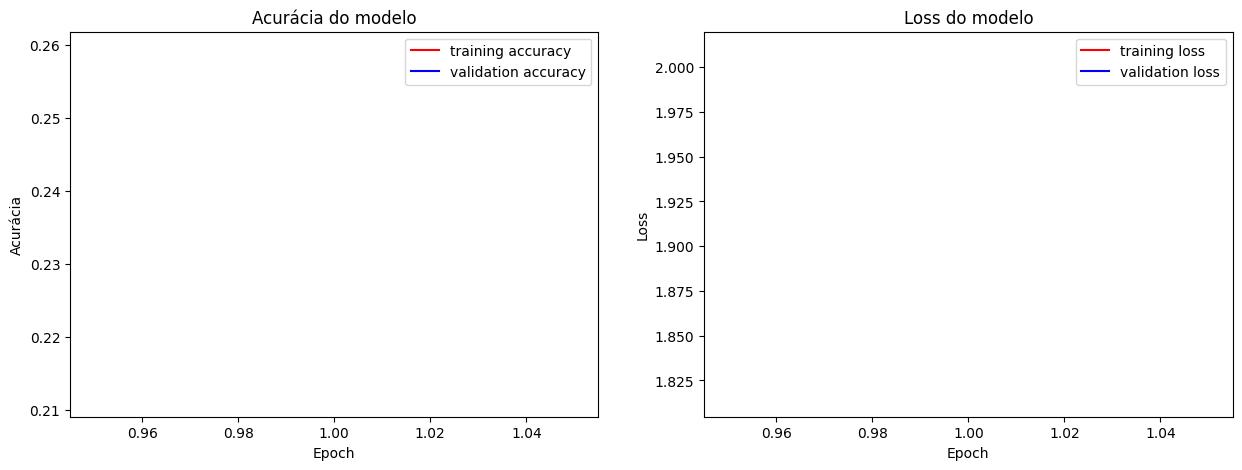

In [ ]:
def plota_historico_modelo(historico_modelo):
  fig, axs = plt.subplots(1, 2, figsize=(15,5))     # Cria uma figura com dois gráficos lado a lado (1 linha, 2 colunas), com um tamanho de 15x5 polegadas

  # Primeiro gráfico: Acurácia do modelo durante o treinamento e validação
  axs[0].plot(range(1, len(historico_modelo.history['accuracy']) + 1), historico_modelo.history['accuracy'], 'r')
  axs[0].plot(range(1, len(historico_modelo.history['val_accuracy']) + 1), historico_modelo.history['val_accuracy'], 'b')
  axs[0].set_title('Acurácia do modelo')
  axs[0].set_ylabel('Acurácia')
  axs[0].set_xlabel('Epoch')
  axs[0].legend(['training accuracy', 'validation accuracy'], loc = 'best')

  # Segundo gráfico: Perda (Loss) do modelo durante o treinamento e validação
  axs[1].plot(range(1, len(historico_modelo.history['loss']) + 1), historico_modelo.history['loss'], 'r')
  axs[1].plot(range(1, len(historico_modelo.history['val_loss']) + 1), historico_modelo.history['val_loss'], 'b')
  axs[1].set_title('Loss do modelo')
  axs[1].set_ylabel('Loss')
  axs[1].set_xlabel('Epoch')
  axs[1].legend(['training loss', 'validation loss'], loc = 'best')
  fig.savefig('historico_modelo_mod01.png') # Salva a figura como um arquivo de imagem 'historico_modelo_mod01.png'

# Chama a função para plotar o histórico de treinamento armazenado na variável 'history'
plota_historico_modelo(history)

**Verificando a acurácia do modelo**

In [ ]:
# Relação do erro x acurárcia
scores = model.evaluate(np.array(X_test), np.array(y_test), batch_size = batch_size) #
scores

57/57 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - accuracy: 0.2449 - loss: 1.8333


[1.8301539421081543, 0.2454722821712494]

In [ ]:
print('Acurácia: ' + str(scores[1]))
print('Erro: ' + str(scores[0]))

Acurácia: 0.2454722821712494
Erro: 1.8301539421081543


## Carregamento dos dados para gerar a matriz de confusão

In [ ]:
# Valores reais e das predições
true_y = []
pred_y = []
x = np.load('mod_xtest.npy')
y = np.load('mod_ytest.npy')

In [ ]:
# Carregar o modelo salvo com a estrutura da rede neural
json_file = open(arquivo_modelo_json, 'r')
loaded_model_json = json_file.read()
json_file.close()

In [ ]:
# Transformar o modelo h5
loaded_model = model_from_json(loaded_model_json)
loaded_model.load_weights(arquivo_modelo)

In [ ]:
# Predição dos pixels de cada uma das imagens para cada uma das emoções
y_pred = loaded_model.predict(x)

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step


In [ ]:
# Transformar as predições em uma lista
yp = y_pred.tolist()
yt = y.tolist() # com as respostas reais
count = 0

In [ ]:
# Quantidade de registros na base de dados de teste
len(y)

3589

In [ ]:
# Obtendo o maior valor da probabilidade
for i in range(len(y)):
  yy = max(yp[i])
  yyt = max(yt[i])
  pred_y.append(yp[i].index(yy))
  true_y.append(yt[i].index(yyt))
  if (yp[i].index(yy) == yt[i].index(yyt)):
    count += 1

acc = (count / len(y)) * 100

In [ ]:
# Demonstrar o valor da acurácia
print('Acurácia no conjunto de teste: ' + str(acc))

Acurácia no conjunto de teste: 24.547227640011148


In [ ]:
# Salvar os valores das emoções e predições
np.save('truey_mod01', true_y)
np.save('predy_mod01', pred_y)

**Gerando a Matriz de Confusão**

In [ ]:
# Importa a função 'confusion_matrix' do módulo 'metrics' da biblioteca 'sklearn' (scikit-learn).
# A 'confusion_matrix' é usada para avaliar o desempenho de um modelo de classificação.
# Ela compara as previsões do modelo com os valores reais (rótulos) e organiza os resultados em uma tabela,
# mostrando o número de verdadeiros positivos, verdadeiros negativos, falsos positivos e falsos negativos.
from sklearn.metrics import confusion_matrix

In [ ]:
# Carrega os arrays 'y_true' e 'y_pred' a partir de arquivos .npy (arquivos numpy).
# 'y_true' contém os rótulos verdadeiros (valores reais) do conjunto de dados.
# 'y_pred' contém as previsões feitas pelo modelo.
y_true = np.load('truey_mod01.npy')
y_pred = np.load('predy_mod01.npy')

In [ ]:
# Matriz de acertos classe por classe
cm = confusion_matrix(y_true, y_pred)
expressoes = ['Raiva', 'Nojo', 'Medo', 'Feliz', 'Triste', 'Surpreso', 'Neutro']
titulo = 'Matriz de Confusão'
print(cm)

[[  0   0   0 498   0   0   0]
 [  0   0   0  52   0   0   0]
 [  0   0   0 545   0   0   0]
 [  0   0   0 881   0   0   0]
 [  0   0   0 588   0   0   0]
 [  0   0   0 414   0   0   0]
 [  0   0   0 611   0   0   0]]


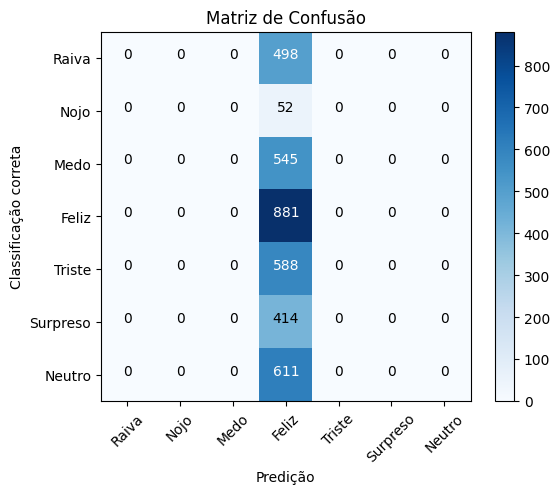

In [ ]:
# Construindo a matriz de confusão
import itertools
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title(titulo)
plt.colorbar()
tick_marks = np.arange(len(expressoes))
plt.xticks(tick_marks, expressoes, rotation = 45)
plt.yticks(tick_marks, expressoes)
fmt = 'd'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
  plt.text(j, i, format(cm[i, j], fmt), horizontalalignment='center', color='white' if cm[i,j] > thresh else 'black')

plt.ylabel('Classificação correta')
plt.xlabel('Predição')
plt.savefig('matriz_confusao_mod01.png')

## Testando o modelo

In [ ]:
ls /content/testes/

homem_raiva.jpg     mulher_feliz.jpg   teste01.png  teste03.jpg  teste05.jpg
homem_surpreso.jpg  mulher_triste.jpg  teste02.jpg  teste04.jpg  teste06.jpg


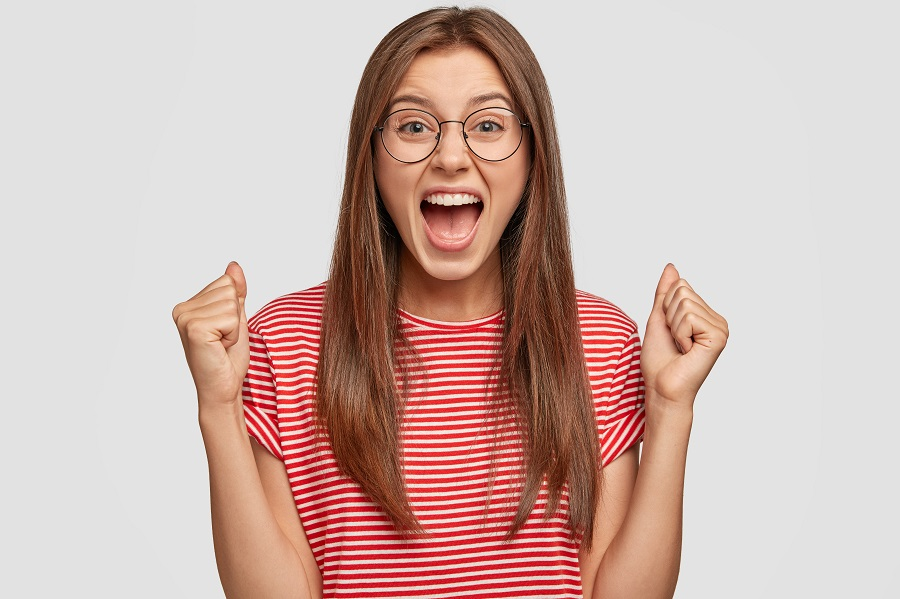

In [ ]:
# Localize o arquivo "salagooglemeet.jpg" para realizar o reconhecimento das emoções
imagem = cv2.imread('/content/testes/mulher_feliz.jpg')
cv2_imshow(imagem)

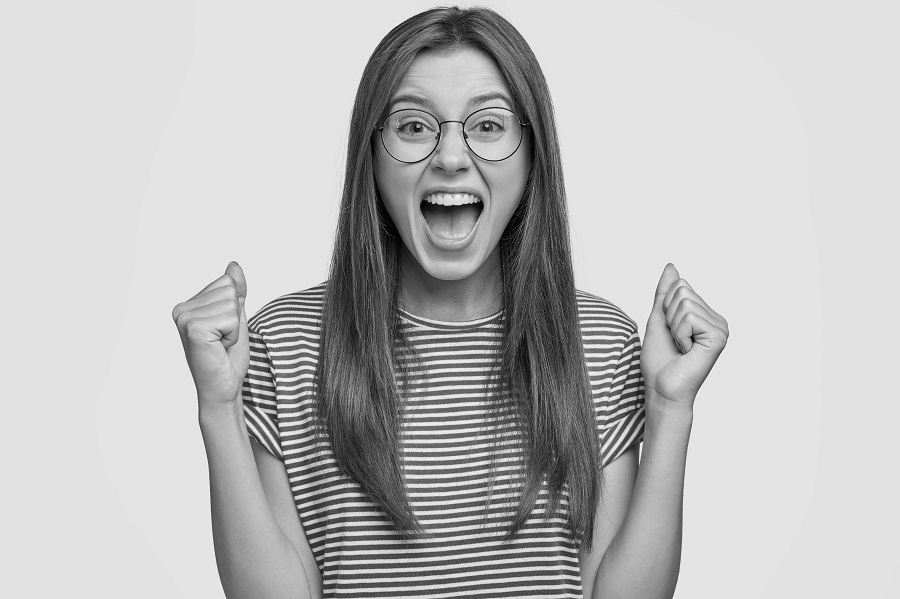

In [ ]:
# Transformando a imagem original em escala de cinza
original = imagem.copy()
gray = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

In [ ]:
# Utilize o arquivo haarcascade de reconhecimento facial para detectar as faces na imagem
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
faces = face_cascade.detectMultiScale(gray, 1.1, 3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


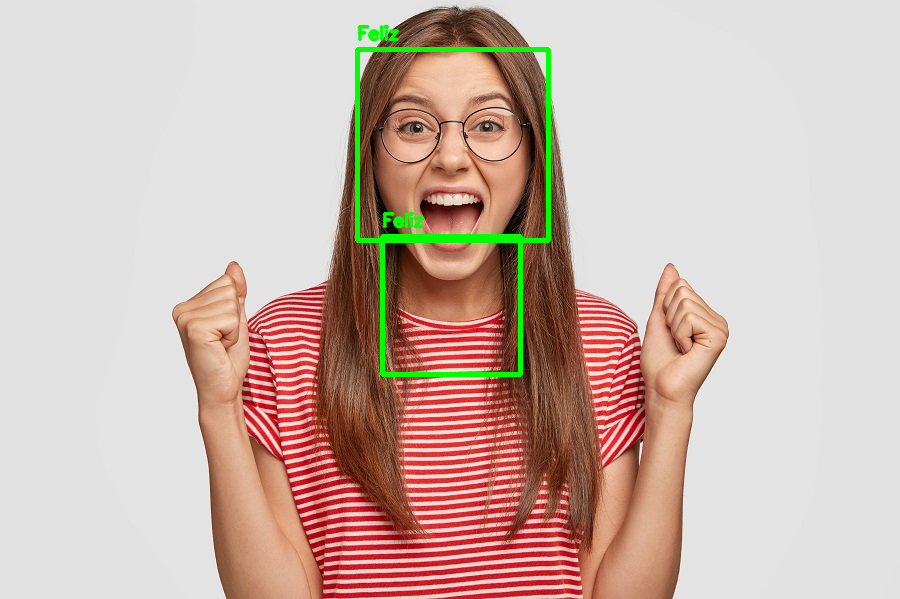

In [ ]:
# Reconhecendo as emoções nas faces detectadas, criando um retângulo e indicação textual na imagem original.
for (x, y, w, h) in faces:
  cv2.rectangle(original, (x, y), (x + w, y + h), (0, 255, 0), 4)
  roi_gray = gray[y:y + h, x:x + w]
  roi_gray = roi_gray.astype('float') / 255.0
  cropped_img = np.expand_dims(np.expand_dims(cv2.resize(roi_gray, (48, 48)), -1), 0)
  prediction = loaded_model.predict(cropped_img)[0]
  cv2.putText(original, expressoes[int(np.argmax(prediction))], (x, y - 10),
              cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 255, 0), 2, cv2.LINE_AA)

cv2_imshow(original)